In [1]:
import pickle
from deap import tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
experiment_name = 'biased_mating_adaptive_mutation'

In [6]:
enemy_id = 1
run = 1

with open(f'logBook/biased/enemy_{enemy_id}/logBook_run_{run}.pkl', 'rb') as f:
    logBook_biased = pickle.load(f)

with open(f'logBook/random/enemy_{enemy_id}/logBook_run_{run}.pkl', 'rb') as f:
    logBook_random = pickle.load(f)

In [9]:
# logBook_random.select('max')

In [58]:
# print(logBook)

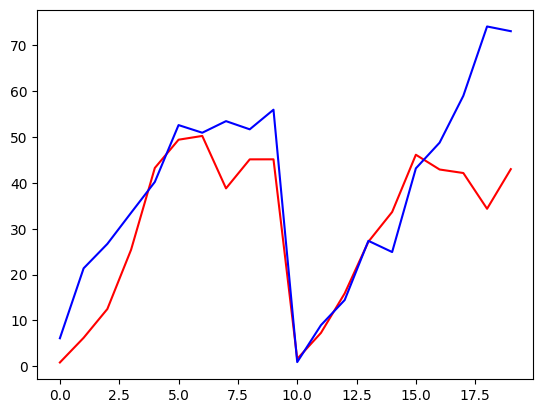

In [8]:
plt.plot(logBook_biased.select('mean'), 'r')
plt.plot(logBook_random.select('mean'), 'b')

In [39]:
# enemy_id = 1
# experiment_name = 'eaMuPlusLambda_optimization'

# with open(f'logBook/best_{enemy_id}_{experiment_name}_logBook.pkl', 'rb') as f:
#     logBook_MuPlusLambda = pickle.load(f)

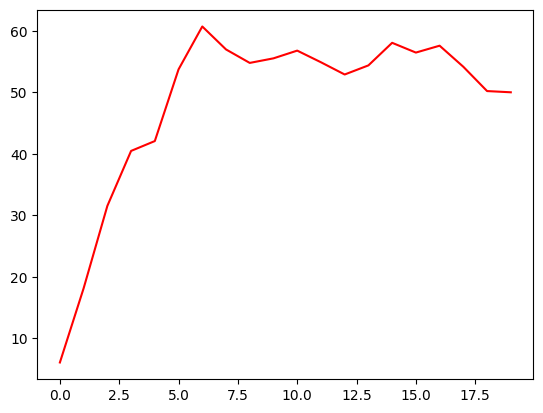

In [37]:
plt.plot(logBook.select('mean'), 'r')

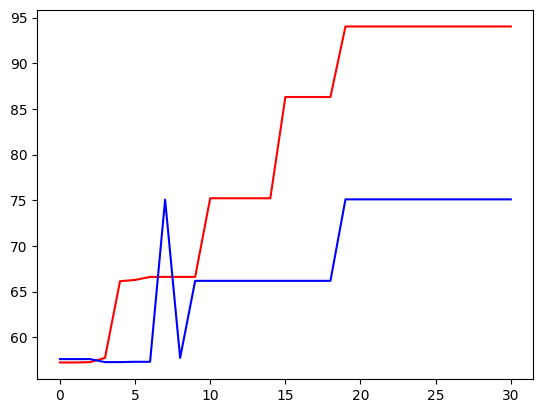

In [36]:
plt.plot(logBook_SEA.select('max'), 'r')
plt.plot(logBook_MuPlusLambda.select('max'), 'b')